1. Họ và tên:  Nguyễn Vũ Dương

2. MSSV:  20520465

3. Bài tập 2 

4. Ngày thực hiện: 24/10/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Faster-RCNN

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.axis('off')
  plt.imshow(image)

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
def draw(image, max_boxes, min_score, boxes, class_names, scores): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                            25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  detected_boxes = boxes.shape[0] 
  count = 0
  for i in range(min(max_boxes, detected_boxes)):
    if scores[i] >= min_score:

      ymin, xmin, ymax, xmax = tuple(boxes[i]) 
      
      
      display_str = "{}: {}%".format(class_names[i].decode("ascii"), 
                                     int(100 * scores[i]))
      
      color = colors[hash(class_names[i]) % len(colors)]

      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      
      draw_bbox_text_on_image(
          image_pil,
          ymin, xmin,
          ymax, xmax,
          color, font,
          display_str_list=[display_str]
      )
      np.copyto(image, np.array(image_pil))
  #print(count)
  return image   

def draw_bbox_text_on_image(image,
                            ymin, xmin,
                            ymax, xmax,
                            color, font, thickness=4,
                            display_str_list=()):
  

  
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    

    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
              (left, top)],
              width=thickness,
              fill=color)

    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list] # 11

    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights) # 12
    

    if top > total_display_str_height:
      text_bottom = top
    else:
      text_bottom = top + total_display_str_height 
    for display_str in display_str_list:
      text_width, text_height = font.getsize(display_str)
      margin = np.ceil(0.05 * text_height)

      draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                      (left + text_width, text_bottom)],
                    fill=color)
      
      draw.text((left + margin, text_bottom - text_height - margin),
                display_str,
                fill="black",
                font=font)
    #print(count)    


In [ ]:
def run_detector(detector, path, max_boxes, max_score):


  img = load_img(path)

  converted_img= tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  #print('Detecting Image ...')
  start_time = time.time()
  output = detector(converted_img) 
  end_time = time.time()
  print("Execute time: "+str(end_time-start_time)+"s")
  #print('Detection Complete\n')

  #for key, value in output.items():
    #print(f'Key:{key}\nValue:{value}\n\n')

  output = {key:value.numpy() for key,value in output.items()}
  #print("Found %d objects." % len(output["detection_scores"]))
  image_with_boxes = draw(img.numpy(),
                          max_boxes, max_score,
                          output['detection_boxes'],
                          output['detection_class_entities'], 
                          output['detection_scores'])
  count = 0
  for i in range (0,len(output['detection_class_entities'])):
    if output['detection_class_entities'][i] == b'Person' and output['detection_scores'][i]>max_score  :
      count +=1
    elif output['detection_class_entities'][i] == b'Woman' and output['detection_scores'][i]>max_score:
      count +=1
    elif  output['detection_class_entities'][i] == b'Man' and output['detection_scores'][i]>max_score: 
      count +=1
    elif output['detection_class_entities'][i] == b'Boy' and output['detection_scores'][i]>max_score:  
      count +=1
    elif output['detection_class_entities'][i] == b'Girl' and output['detection_scores'][i]>max_score:
      count +=1    
  print("Số lượng người trong ảnh là: "+str(count))
  display_image(image_with_boxes)

In [ ]:
faster_rcnn_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"


print('loading model...')
detector = hub.load(faster_rcnn_url).signatures['default']
print('model loaded!') 

loading model...
model loaded!


In [ ]:
path = '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/'
img_pedestrian = ['Pedestrian_01.jpg','Pedestrian_02.jpg','pedestrian-03.jpg','pedestrian-04.jpg','pedestrian-05.jpg']
img_camourflage = ['camourflage_00496.jpg','camourflage_00473.jpg']
img_bantia = ['linh-ban-tia-2.jpg','linh-ban-tia-3.jpg']

Số lượng người trong ảnh pedestrian-05

Execute time: 28.045077562332153s
Số lượng người trong ảnh là: 28


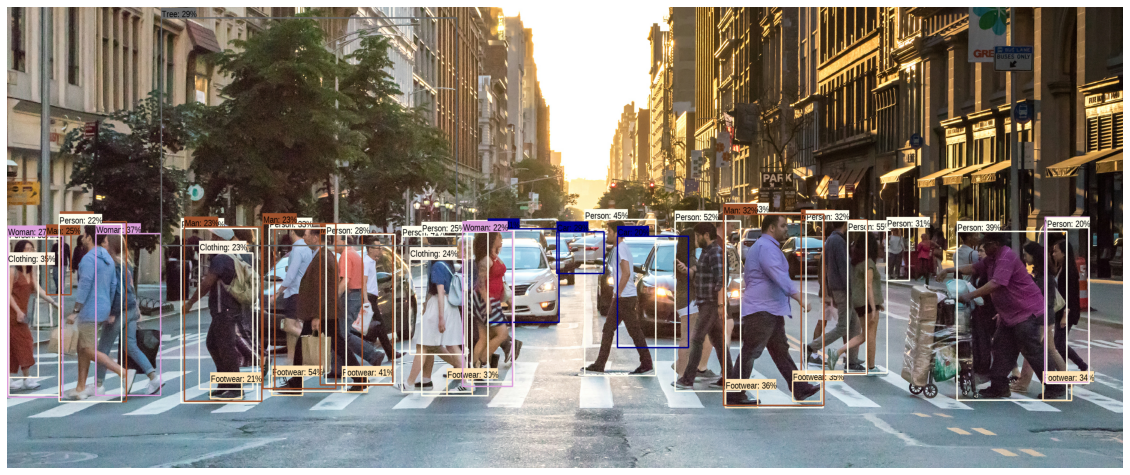

In [ ]:
run_detector(detector, path+img_pedestrian[-1], max_boxes=9999, max_score=0.2)

In [ ]:
for i in img_pedestrian:
  print('Ảnh '+str(i))
  run_detector(detector, path+i, max_boxes=9999, max_score=0.2)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in img_camourflage:
  print('Ảnh '+str(i))
  run_detector(detector, path+i, max_boxes=9999, max_score=0.2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in img_bantia:
  print('Ảnh '+str(i))
  run_detector(detector, path+i, max_boxes=9999, max_score=0.2)

Output hidden; open in https://colab.research.google.com to view.

#Yolo v7

In [ ]:
%cd /content/yolov5/yolov7

/content/yolov5/yolov7


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (467/467), done.
/content/yolov5/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com


In [ ]:
!python detect.py --weights yolov7-tiny.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/Pedestrian_01.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/Pedestrian_01.jpg', update=False, view_img=False, weights=['yolov7-tiny.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
7 persons, 7 cars, 2 handbags, Done. (304.4ms) Inference, (15.8ms) NMS
 The image with the resu

In [ ]:
import cv2
img = cv2.imread('/content/yolov5/yolov7/runs/detect/exp2/Pedestrian_01.jpg')

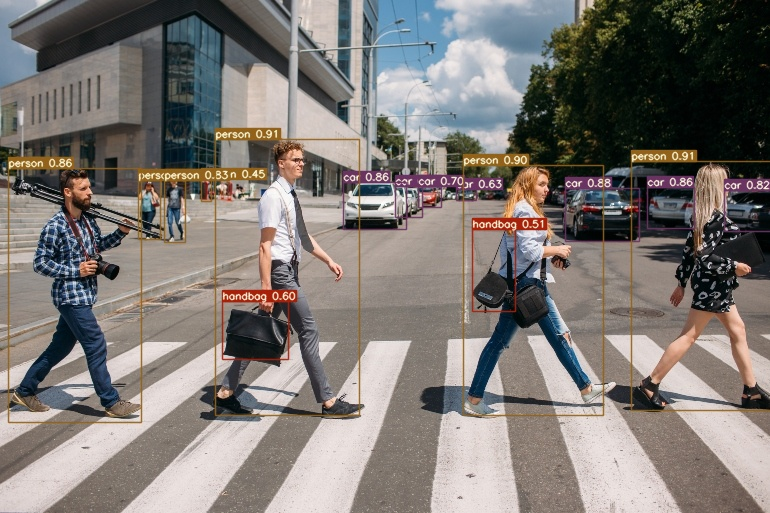

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
!python detect.py --weights yolov7-tiny.pt --conf 0.01 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/linh-ban-tia-3.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.01, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/linh-ban-tia-3.jpg', update=False, view_img=False, weights=['yolov7-tiny.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2 persons, 2 birds, 1 giraffe, Done. (280.4ms) Inference, (5.3ms) NMS
 The image with the res

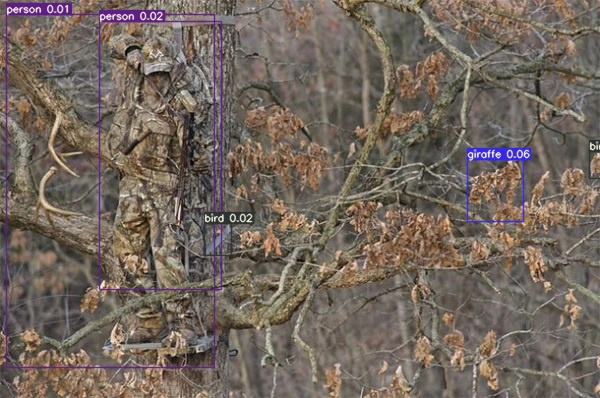

In [ ]:
cv2_imshow(cv2.imread('/content/yolov5/yolov7/runs/detect/exp6/linh-ban-tia-3.jpg'))

In [ ]:
!python detect.py --weights yolov7-tiny.pt --conf 0.01 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/camourflage_00473.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.01, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/camourflage_00473.jpg', update=False, view_img=False, weights=['yolov7-tiny.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
5 birds, 2 apples, Done. (409.9ms) Inference, (2.0ms) NMS
 The image with the result is sa

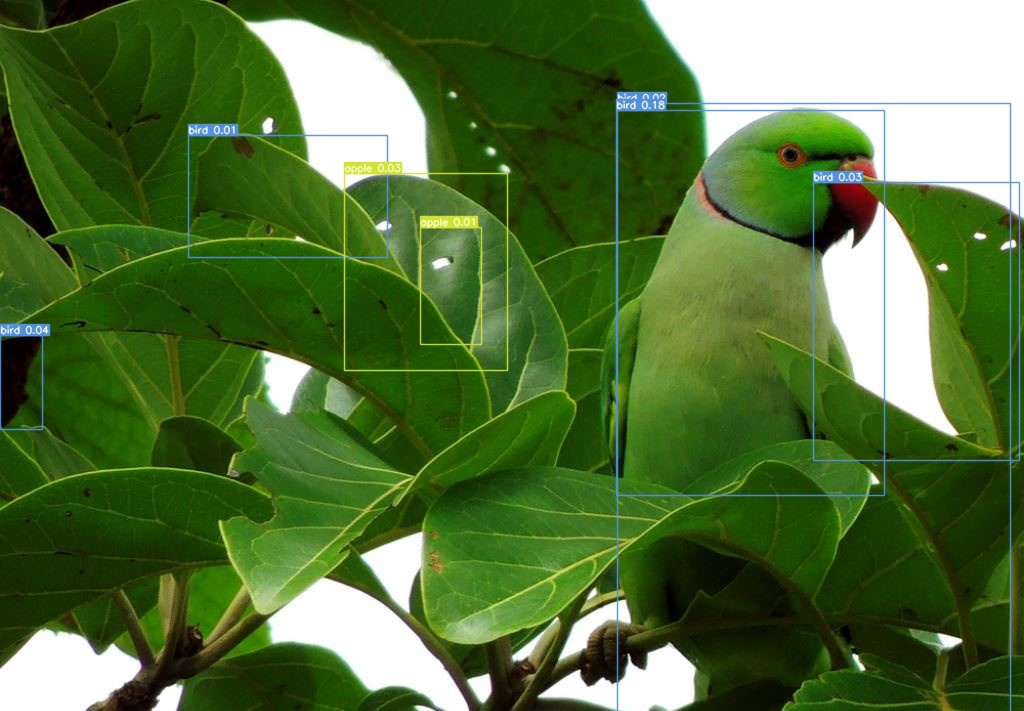

In [ ]:
cv2_imshow(cv2.imread('/content/yolov5/yolov7/runs/detect/exp7/camourflage_00473.jpg'))

In [ ]:
!python detect.py --weights yolov7-tiny.pt --conf 0.4 --img-size 640 --source /content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-03.jpg', update=False, view_img=False, weights=['yolov7-tiny.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CPU

Fusing layers... 
Model Summary: 200 layers, 6219709 parameters, 229245 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 person, 2 cars, Done. (300.3ms) Inference, (1.4ms) NMS
 The image with the result is saved in

In [ ]:
cv2_imshow(cv2.imread('/content/yolov5/yolov7/runs/detect/exp3/pedestrian-03.jpg'))

Output hidden; open in https://colab.research.google.com to view.

#Yolo v5

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14379, done.
remote: Total 14379 (delta 0), reused 0 (delta 0), pack-reused 14379
Receiving objects: 100% (14379/14379), 13.26 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (9951/9951), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 26.2 MB/s 


In [ ]:
from matplotlib import pyplot as plt
import torch
import os
import cv2
import numpy as np	

In [ ]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-24 Python-3.7.15 torch-1.12.1+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [73]:
def show_img(path,conf = 0.3):
  model.conf = conf
  pic1 = cv2.imread(path)
  start_time = time.time()
  result1 = model(cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB))
  end_time = time.time()
  print("Execute time: "+str(end_time-start_time)+"s")
  result1.print()
  result1.show()


In [82]:
for i in img_pedestrian:
  show_img(path+i)

Output hidden; open in https://colab.research.google.com to view.

image 1/1: 463x600 (no detections)
Speed: 5.5ms pre-process, 329.7ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)


Execute time: 0.3373682498931885s


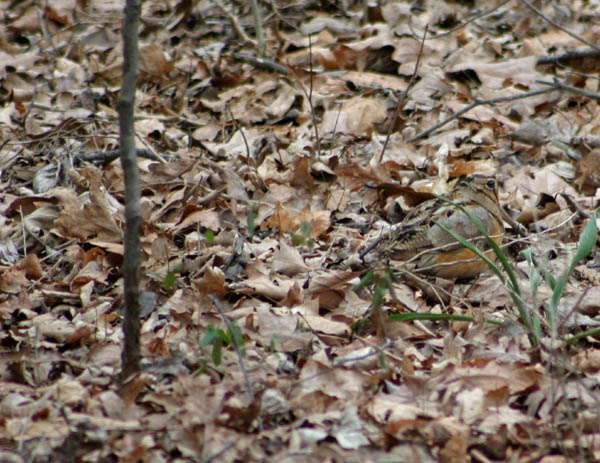

image 1/1: 711x1024 6 birds, 1 apple
Speed: 6.9ms pre-process, 322.6ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


Execute time: 0.3328220844268799s


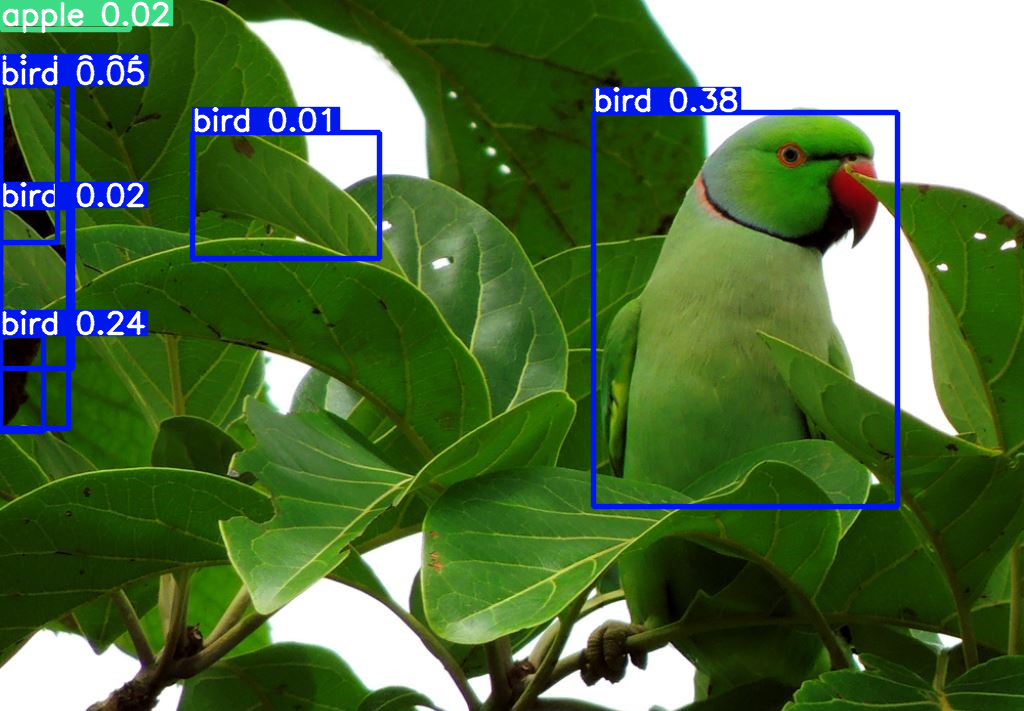

In [79]:
for i in img_camourflage:
  show_img(path+i,0.01)

image 1/1: 398x600 4 birds
Speed: 4.5ms pre-process, 290.7ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


Execute time: 0.29776930809020996s


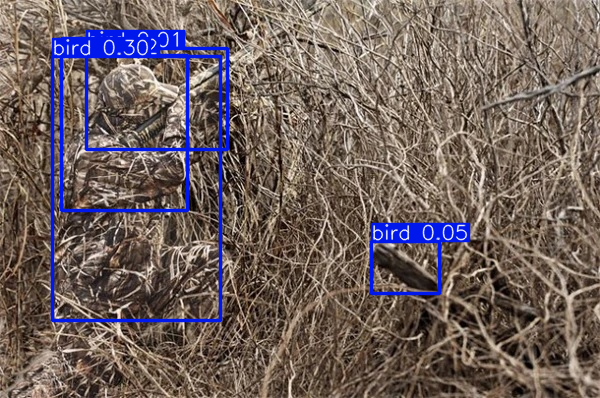

image 1/1: 398x600 1 bird
Speed: 6.2ms pre-process, 359.1ms inference, 1.2ms NMS per image at shape (1, 3, 448, 640)


Execute time: 0.3676912784576416s


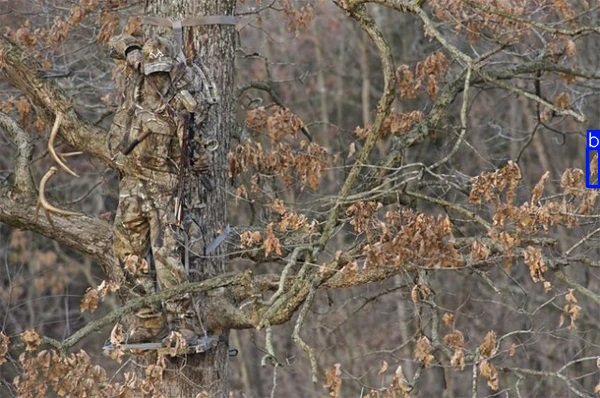

In [80]:
for i in img_bantia:
  show_img(path+i,0.01)

#Số lượng người trong ảnh pedestrian-05

In [ ]:
result5 = model(cv2.cvtColor(cv2.imread("/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-05.jpg"), cv2.COLOR_BGR2RGB))
df = result5.pandas().xyxy[0]
print('Number of human in pic5 : ',df['name'].value_counts()[0])

Number of human in pic5 :  22


#Yêu cầu 3

Với Faster-RCNN detect object chậm hơn Yolov5

Execute time: 29.101227283477783s
Số lượng người trong ảnh là: 28


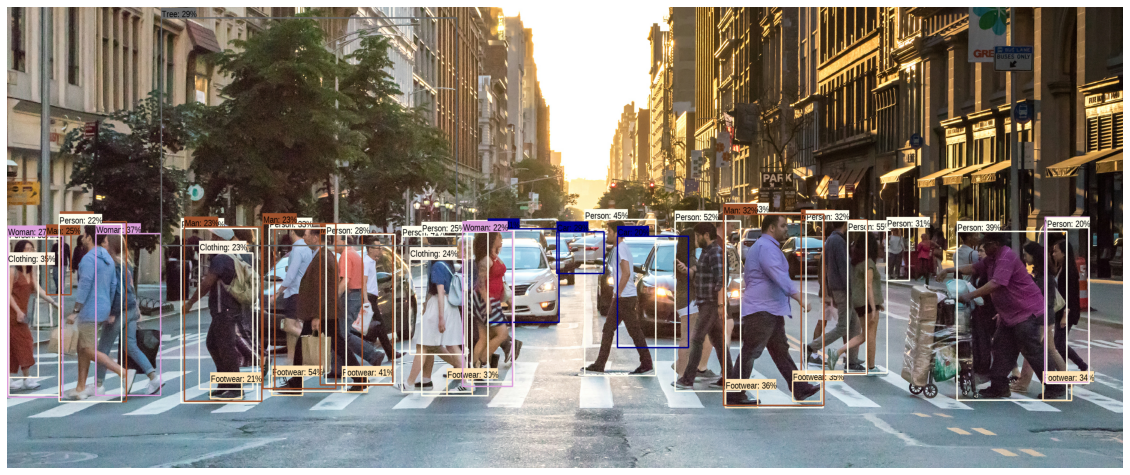

In [ ]:
run_detector(detector, '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-05.jpg', max_boxes=9999, max_score=0.2)

In [81]:
show_img('/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap2/images/pedestrian-05.jpg',0.2)

Output hidden; open in https://colab.research.google.com to view.